___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [50]:
df= pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [51]:
df.shape

(10000, 14)

In [52]:
df.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


<AxesSubplot:xlabel='Exited', ylabel='count'>

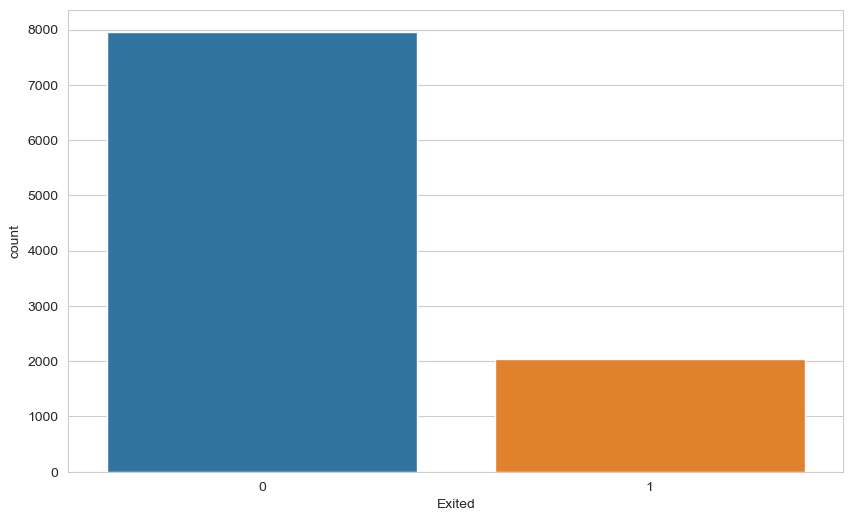

In [54]:
sns.countplot(df["Exited"])

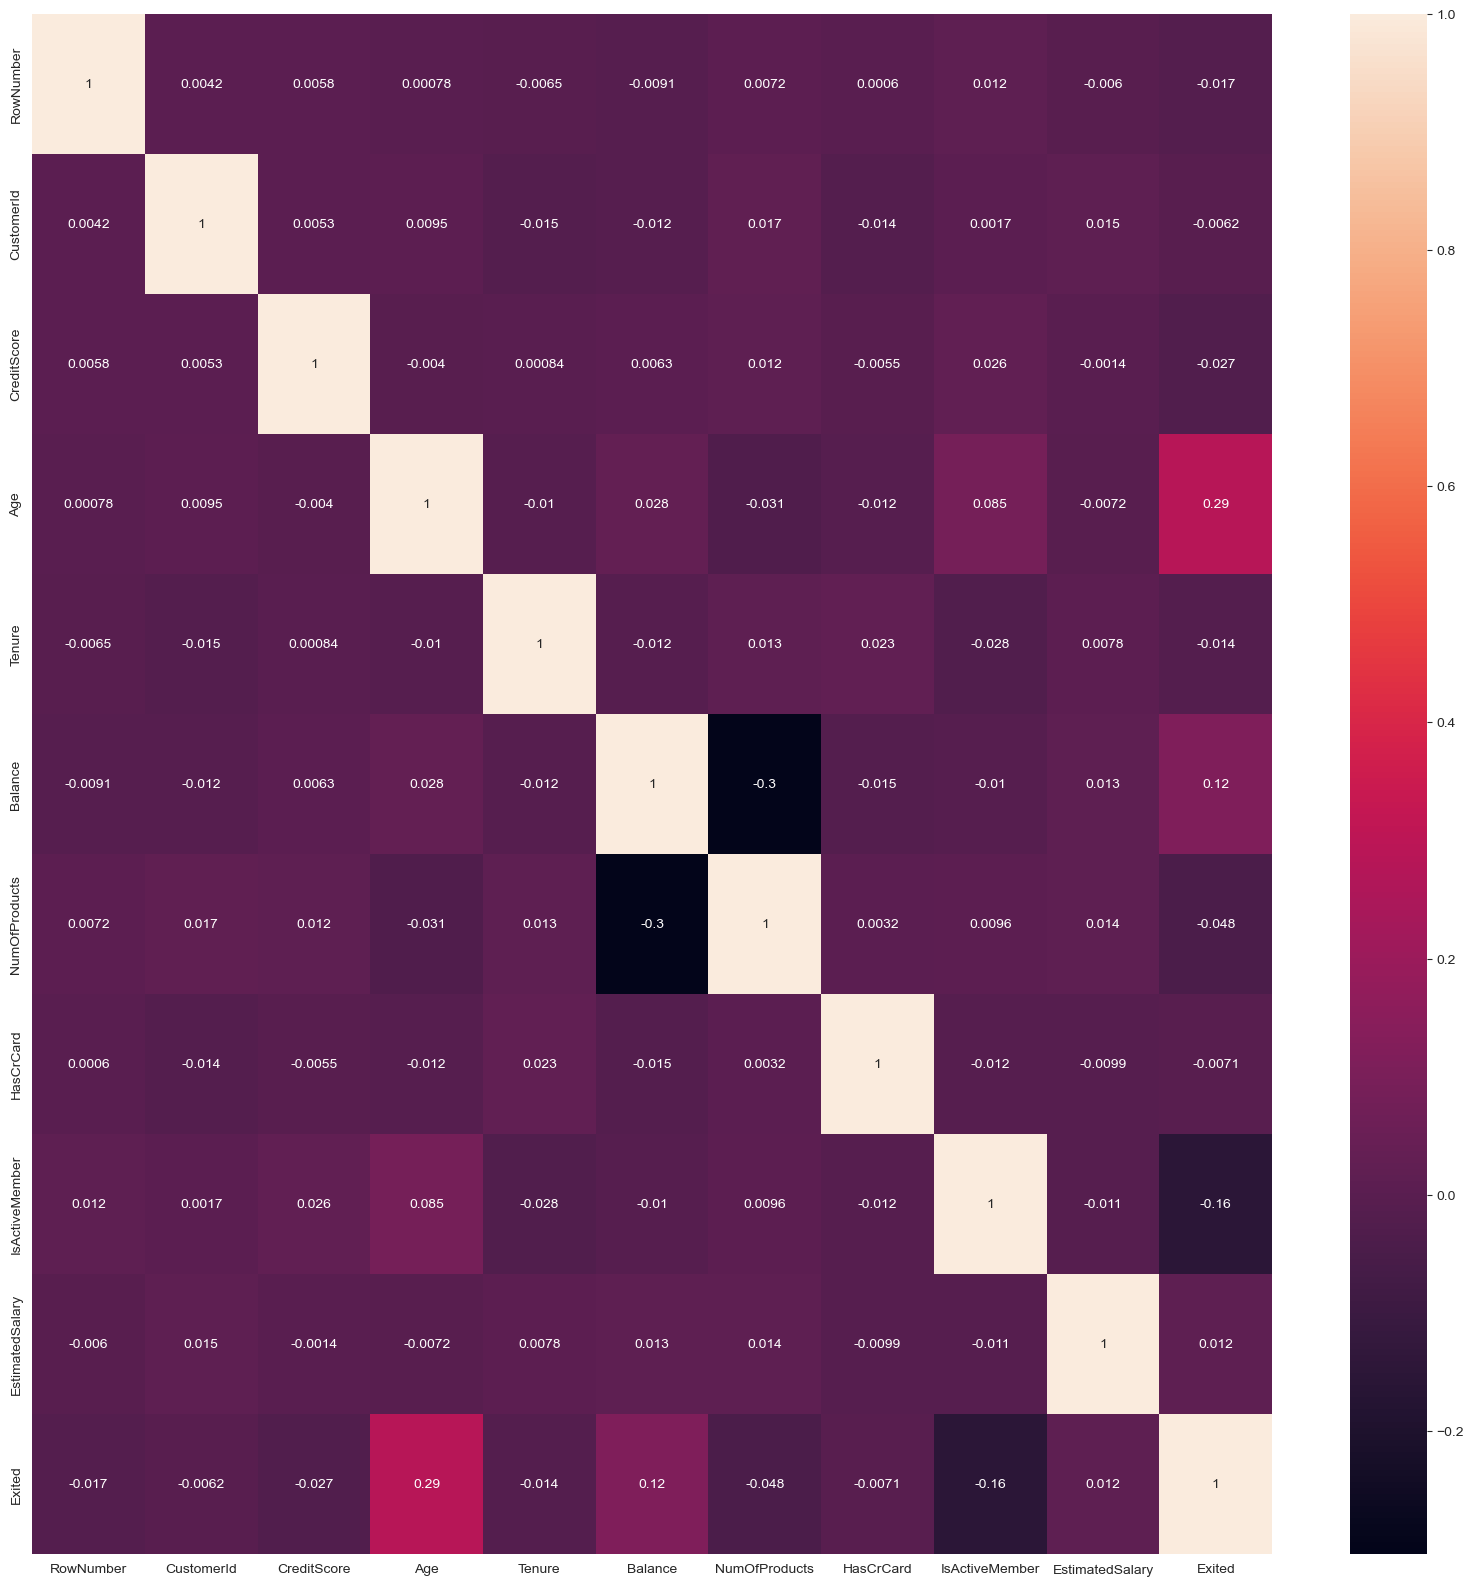

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

In [56]:
drop_list = ["Surname"]
df=df.drop(drop_list, axis=1)
df=pd.get_dummies(df, prefix=['Geography', 'Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   CreditScore        10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Geography_France   10000 non-null  uint8  
 12  Geography_Germany  10000 non-null  uint8  
 13  Geography_Spain    10000 non-null  uint8  
 14  Gender_Female      10000 non-null  uint8  
 15  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(9)

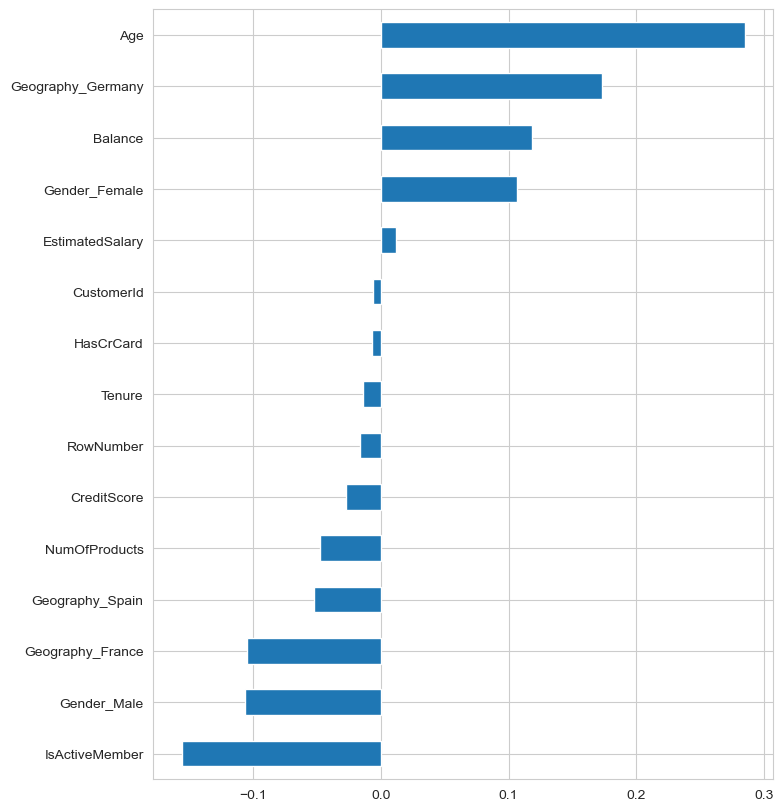

In [57]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");

# Preprocessing of Data
- Train | Test Split, Scalling

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [59]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [60]:
seed = 42

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [62]:
scaler = MinMaxScaler()

In [63]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [65]:
X_train.shape

(9000, 15)

In [66]:
X_test.shape

(1000, 15)

## without class_weigth

### Create The Model

In [67]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [68]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4987 - accuracy: 0.7949 - val_loss: 0.4523 - val_accuracy: 0.8000
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4593 - accuracy: 0.8025 - val_loss: 0.4263 - val_accuracy: 0.8211
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8152 - val_loss: 0.3978 - val_accuracy: 0.8422
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8235 - val_loss: 0.3872 - val_accuracy: 0.8467
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8267 - val_loss: 0.3849 - val_accuracy: 0.8489
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8290 - val_loss: 0.3699 - val_accuracy: 0.8556
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8316 - val_loss: 0.3700 - val_accuracy:

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                576       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,423
Trainable params: 1,423
Non-trainable params: 0
_________________________________________________________________


In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.499,0.795,0.452,0.800
1,0.459,0.802,0.426,0.821
2,0.437,0.815,0.398,0.842
3,0.423,0.823,0.387,0.847
4,0.414,0.827,0.385,0.849


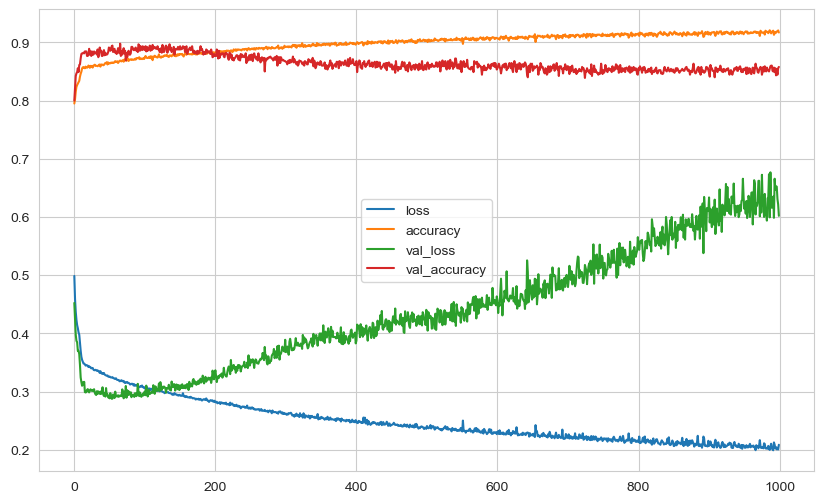

In [71]:
loss_df.plot();

In [72]:
model.evaluate(X_test, y_test, verbose=0)

[0.728122353553772, 0.8330000042915344]

In [73]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.728122353553772
accuracy :  0.8330000042915344


In [74]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[732  64]
 [103 101]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       796
           1       0.61      0.50      0.55       204

    accuracy                           0.83      1000
   macro avg       0.74      0.71      0.72      1000
weighted avg       0.82      0.83      0.83      1000



## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [77]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)


In [79]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 0.8622 - val_loss: 0.2914 - val_accuracy: 0.8867
Epoch 2/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8626 - val_loss: 0.3021 - val_accuracy: 0.8789
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8615 - val_loss: 0.2893 - val_accuracy: 0.8889
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3296 - accuracy: 0.8621 - val_loss: 0.2893 - val_accuracy: 0.8878
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8604 - val_loss: 0.2962 - val_accuracy: 0.8811
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8610 - val_loss: 0.2873 - val_accuracy: 0.8878
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8635 - val_loss: 0.2931 - val_accuracy:

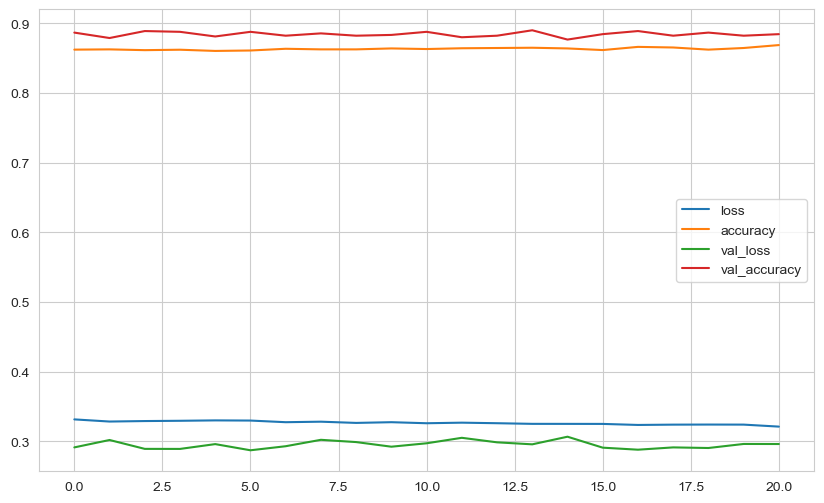

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [81]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34071293473243713
accuracy :  0.8579999804496765


In [82]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[768  28]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       796
           1       0.76      0.44      0.56       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.74      1000
weighted avg       0.85      0.86      0.84      1000



In [83]:
from tensorflow.keras.optimizers import Adam

In [84]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
opt = Adam(lr = 0.005) # Farklı rakamlarla deneme yapmak lazım
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [85]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [86]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4662 - accuracy: 0.7960 - val_loss: 0.4225 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4290 - accuracy: 0.8105 - val_loss: 0.3854 - val_accuracy: 0.8300
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.4014 - accuracy: 0.8298 - val_loss: 0.3437 - val_accuracy: 0.8789
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3723 - accuracy: 0.8444 - val_loss: 0.3068 - val_accuracy: 0.8878
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.3607 - accuracy: 0.8462 - val_loss: 0.3079 - val_accuracy: 0.8722
Epoch 6/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.3554 - accuracy: 0.8512 - val_loss: 0.3011 - val_accuracy: 0.8867
Epoch 7/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.3531 - accuracy: 0.8567 - val_loss: 0.3039 - val_accuracy:

<AxesSubplot:>

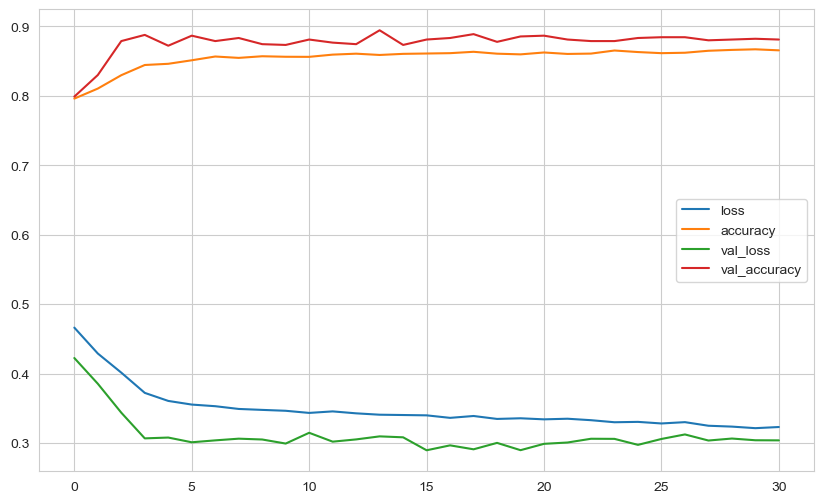

In [87]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [88]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3476702570915222
accuracy :  0.8569999933242798


In [89]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[770  26]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.77      0.43      0.55       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.73      1000
weighted avg       0.85      0.86      0.84      1000



In [90]:
from tensorflow.keras.layers import Dropout

In [91]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(lr = 0.001) # default 
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [92]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1)

Epoch 1/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5928 - accuracy: 0.7256 - val_loss: 0.4931 - val_accuracy: 0.7989
Epoch 2/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5355 - accuracy: 0.7935 - val_loss: 0.4948 - val_accuracy: 0.7989
Epoch 3/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5204 - accuracy: 0.7962 - val_loss: 0.4798 - val_accuracy: 0.7989
Epoch 4/1000
254/254 [==============================] - 1s 2ms/step - loss: 0.5145 - accuracy: 0.7949 - val_loss: 0.4718 - val_accuracy: 0.7989
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7951 - val_loss: 0.4718 - val_accuracy: 0.7989
Epoch 6/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7967 - val_loss: 0.4596 - val_accuracy: 0.7989
Epoch 7/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7964 - val_loss: 0.4602 - val_accuracy:

<AxesSubplot:>

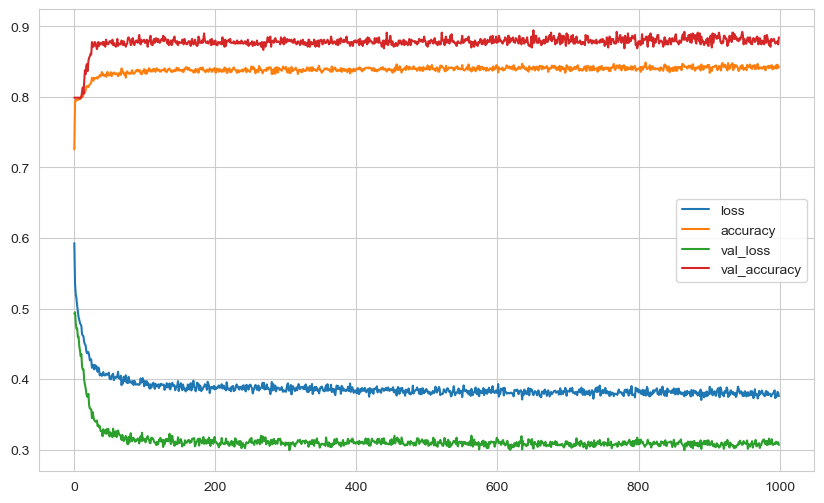

In [93]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [94]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3419261872768402
accuracy :  0.8510000109672546


In [95]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[775  21]
 [128  76]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.78      0.37      0.50       204

    accuracy                           0.85      1000
   macro avg       0.82      0.67      0.71      1000
weighted avg       0.84      0.85      0.83      1000



In [96]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [97]:
def build_classifier():
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [98]:
classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)
scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]
df_scores

29/29 [==============================] - 0s 766us/step


,test_accuracy,test_precision,test_recall,test_f1
1,0.832,0.641,0.439,0.521
2,0.849,0.723,0.485,0.580
3,0.848,0.742,0.456,0.565
4,0.860,0.700,0.565,0.625
5,0.844,0.636,0.469,0.539
6,0.839,0.589,0.517,0.551
7,0.838,0.601,0.506,0.549
8,0.850,0.642,0.497,0.560
9,0.837,0.650,0.526,0.581
10,0.878,0.771,0.558,0.647


In [99]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.847,0.013
pre,0.669,0.061
rec,0.502,0.041
f1,0.572,0.039


## GridSearchCV

In [100]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
def build_classifier(optimizer, learn_rate):
    tf.random.set_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [101]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [102]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}
grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
254/254 [==============================] - 2s 3ms/step - loss: 0.4682 - accuracy: 0.7925 - val_loss: 0.4027 - val_accuracy: 0.8389
Epoch 2/200
254/254 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8191 - val_loss: 0.4444 - val_accuracy: 0.7922
Epoch 3/200
254/254 [==============================] - 0s 2ms/step - loss: 0.3847 - accuracy: 0.8406 - val_loss: 0.3379 - val_accuracy: 0.8744
Epoch 4/200
254/254 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8474 - val_loss: 0.3154 - val_accuracy: 0.8811
Epoch 5/200
254/254 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8495 - val_loss: 0.3232 - val_accuracy: 0.8733
Epoch 6/200
254/254 [==============================] - 0s 1ms/step - loss: 0.3533 - accuracy: 0.8538 - val_loss: 0.3075 - val_accuracy: 0.8756
Epoch 7/200
254/254 [==============================] - 0s 2ms/step - loss: 0.35

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001CEFC4BC640>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [103]:
grid_model.best_score_

0.8602222222222222

In [104]:
grid_model.best_params_ 

{'batch_size': 32,
 'learn_rate': 0.005,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

In [105]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by="rank_test_score")
grid_result

,mean_test_score,std_test_score,rank_test_score,params
11,0.860,0.013,1,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
20,0.859,0.012,2,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
8,0.859,0.011,3,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
21,0.859,0.010,4,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
7,0.858,0.013,5,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
19,0.858,0.012,6,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
17,0.858,0.011,7,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
16,0.858,0.011,7,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
1,0.857,0.012,9,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
5,0.857,0.011,10,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."


In [106]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 968us/step
[[772  24]
 [110  94]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       796
           1       0.80      0.46      0.58       204

    accuracy                           0.87      1000
   macro avg       0.84      0.72      0.75      1000
weighted avg       0.86      0.87      0.85      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

32/32 [==============================] - 0s 1ms/step


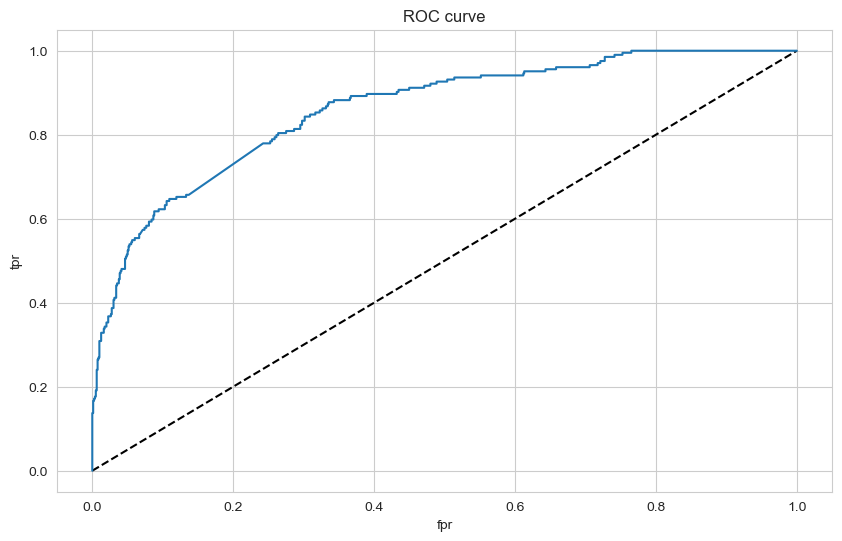

In [107]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [108]:
roc_auc_score(y_test, y_pred_proba)

0.8593888560449305

32/32 [==============================] - 0s 807us/step


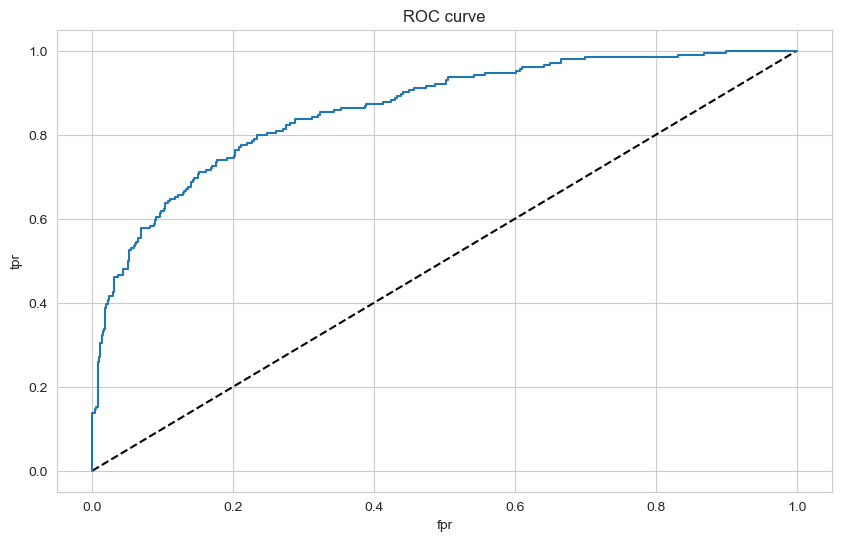

In [109]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [110]:
roc_auc_score(y_test, y_pred_proba)

0.8605342890925214

# Final Model and Model Deployment

In [111]:
import pickle
pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [112]:
tf.random.set_seed(seed)
model = Sequential()
model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [113]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [114]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
282/282 [==============================] - 1s 2ms/step - loss: 0.4839 - accuracy: 0.7966 - val_loss: 0.4612 - val_accuracy: 0.7980
Epoch 2/1000
282/282 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8076 - val_loss: 0.4443 - val_accuracy: 0.8080
Epoch 3/1000
282/282 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8141 - val_loss: 0.4363 - val_accuracy: 0.8100
Epoch 4/1000
282/282 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.8172 - val_loss: 0.4432 - val_accuracy: 0.8030
Epoch 5/1000
282/282 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8216 - val_loss: 0.4241 - val_accuracy: 0.8120
Epoch 6/1000
282/282 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8254 - val_loss: 0.4057 - val_accuracy: 0.8290
Epoch 7/1000
282/282 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8373 - val_loss: 0.3863 - val_accuracy:

<AxesSubplot:>

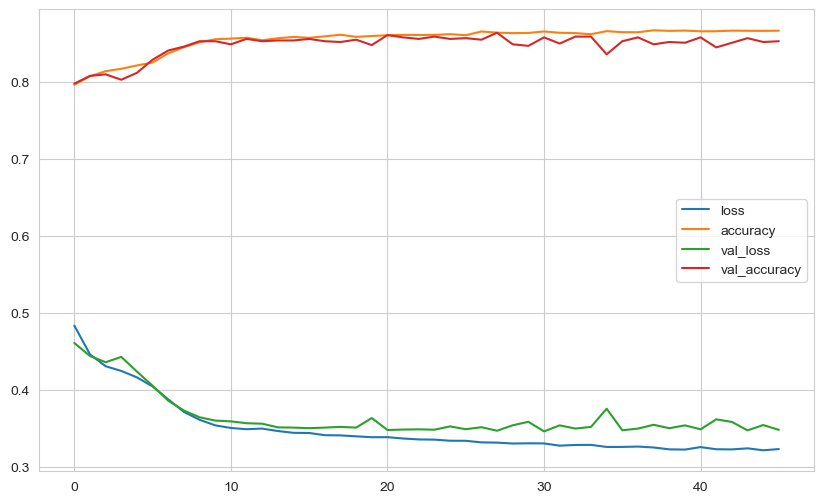

In [115]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [116]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.34645459055900574
accuracy :  0.8579999804496765


In [117]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[773  23]
 [119  85]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.79      0.42      0.54       204

    accuracy                           0.86      1000
   macro avg       0.83      0.69      0.73      1000
weighted avg       0.85      0.86      0.84      1000



In [118]:
model.save('model_exit.h5')

In [119]:
from tensorflow.keras.models import load_model

In [121]:
model_exited = load_model('model_exit.h5')
scaler_exited = pickle.load(open("scaler_cancer", "rb"))

In [122]:
single_customer = df.drop('Exited', axis = 1).iloc[0:1, :]
single_customer

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0


In [123]:
single_customer = scaler_exited.transform(single_customer)
single_customer

array([[0.        , 0.27561613, 0.538     , 0.32432432, 0.2       ,
        0.        , 0.        , 1.        , 1.        , 0.50673489,
        1.        , 0.        , 0.        , 1.        , 0.        ]])

In [125]:
(model_exited.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 66ms/step


array([[0]])

In [126]:
df["Exited"].iloc[0]

1

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[763  33]
 [166  38]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       796
           1       0.54      0.19      0.28       204

    accuracy                           0.80      1000
   macro avg       0.68      0.57      0.58      1000
weighted avg       0.76      0.80      0.76      1000



In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[771  25]
 [117  87]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       796
           1       0.78      0.43      0.55       204

    accuracy                           0.86      1000
   macro avg       0.82      0.70      0.73      1000
weighted avg       0.85      0.86      0.84      1000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___